# Exploring and preparing the data

## 1. Dataset: BICIMAD. Details of the electric bicycle routes

For the development of the project we will use the data provided by the Community of Madrid in its [open data portal](https://opendata.emtmadrid.es/Datos-estaticos/Datos-generales-(1)). 

They provide one file per month in a json format, and each file contains one row per trip.

### 1.1. Data presentation


Each of the files has the following columns:

**__id**: identificator of the movement

**user_day_code**: user code. For a same date, all the movement of the sale user have the same code.

**idunplug_station**: number of the origin station

**idunplug_base**: number of origin base

**idplug_station**: number of destination station

**idplug_base**: number of destionation base

**unplug_hourTime**: time the bicycle is picked up

**travel_time**: time in seconds of the ride

**track**: detail of the ride (GeoJSON)

**user_type**: type of user: 

    - 0: not defined
    - 1: anual user
    - 2: ocasional user
    - 3: worker of bicimad
    
**ageRange**: age range of the user:

    - 0: not defined
    - 1: between 0 and 16 years
    - 2: between 17 and 18 years
    - 3: between 19 and 26 years
    - 4: between 27 and 40 years
    - 5: between 41 and 65 years
    - 6: more than 65 years
    
**zip_code**: postal code of the user

### 1.2. Merging all data into a dataframe


In [1]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The files used take up a lot of space, **The process of reading and merging all dataframes may take long (around 20 minutes).**

In [2]:
#First we create one dataframe per file
movements_january_19=pd.read_json('201901_Usage_Bicimad.json', lines=True)
movements_february_19=pd.read_json('201902_Usage_Bicimad.json', lines=True)
movements_march_19=pd.read_json('201903_Usage_Bicimad.json', lines=True)
movements_april_19=pd.read_json('201904_Usage_Bicimad.json', lines=True)
movements_may_19=pd.read_json('201905_Usage_Bicimad.json', lines=True)
movements_june_19=pd.read_json('201906_Usage_Bicimad.json', lines=True)


In [3]:
movements_july_19=pd.read_json('201907_movements.json', lines=True)
movements_august_19=pd.read_json('201908_movements.json', lines=True)
movements_september_19=pd.read_json('201909_movements.json', lines=True)
movements_october_19=pd.read_json('201910_movements.json', lines=True)
movements_november_19=pd.read_json('201911_movements.json', lines=True)
movements_december_19=pd.read_json('201912_movements.json', lines=True)
movements_january_20=pd.read_json('202001_movements.json', lines=True)
movements_february_20=pd.read_json('202002_movements.json', lines=True)
movements_march_20=pd.read_json('202003_movements.json', lines=True)
movements_april_20=pd.read_json('202004_movements.json', lines=True)
movements_may_20=pd.read_json('202005_movements.json', lines=True)
movements_june_20=pd.read_json('202006_movements.json', lines=True)
movements_july_20=pd.read_json('202007_movements.json', lines=True)
movements_august_20=pd.read_json('202008_movements.json', lines=True)
movements_september_20=pd.read_json('202009_movements.json', lines=True)
movements_october_20=pd.read_json('202010_movements.json', lines=True)
movements_november_20=pd.read_json('202011_movements.json', lines=True)
movements_december_20=pd.read_json('202012_movements.json', lines=True)
movements_january_21=pd.read_json('202101_movements.json', lines=True)
movements_february_21=pd.read_json('202102_movements.json', lines=True)
movements_march_21=pd.read_json('202103_movements.json', lines=True)
movements_april_21=pd.read_json('202104_movements.json', lines=True)
movements_may_21=pd.read_json('202105_movements.json', lines=True)
movements_june_21=pd.read_json('202106_movements.json', lines=True)

There are two types of files, these are distinguished because they have different formats in the unplug hour time column, the files before July 2019 have the column in dictionary format and the files after July 2019 have the column in timestamp UTC format.

Before merging all the dataframes we are going to treat both cases separately, and convert the column ``unplug_hourTime`` into a datetime format (datetime64[ns]).

In [4]:
movements_january_19['unplug_hourTime']

0         {'$date': '2019-01-01T00:00:00.000+0100'}
1         {'$date': '2019-01-01T00:00:00.000+0100'}
2         {'$date': '2019-01-01T00:00:00.000+0100'}
3         {'$date': '2019-01-01T00:00:00.000+0100'}
4         {'$date': '2019-01-01T00:00:00.000+0100'}
                            ...                    
279218    {'$date': '2019-02-01T00:00:00.000+0100'}
279219    {'$date': '2019-02-01T00:00:00.000+0100'}
279220    {'$date': '2019-02-01T00:00:00.000+0100'}
279221    {'$date': '2019-02-01T00:00:00.000+0100'}
279222    {'$date': '2019-02-01T00:00:00.000+0100'}
Name: unplug_hourTime, Length: 279223, dtype: object

In [5]:
movements_january_19['unplug_hourTime'] = movements_january_19['unplug_hourTime'].str['$date']
movements_february_19['unplug_hourTime'] = movements_february_19['unplug_hourTime'].str['$date']
movements_march_19['unplug_hourTime'] = movements_march_19['unplug_hourTime'].str['$date']
movements_april_19['unplug_hourTime'] = movements_april_19['unplug_hourTime'].str['$date']
movements_may_19['unplug_hourTime'] = movements_may_19['unplug_hourTime'].str['$date']
movements_june_19['unplug_hourTime'] = movements_june_19['unplug_hourTime'].str['$date']


In [6]:
#dataframe with journeys before july 2019
movements_1= movements_january_19.append(movements_february_19).append(movements_march_19).append(movements_april_19).append(movements_may_19).append(movements_june_19)

In [9]:
#dataframe with journeys after july 2019
movements = movements_july_19.append(movements_august_19).append(movements_september_19).append(movements_october_19).append(movements_november_19).append(movements_december_19).append(movements_january_20).append(movements_february_20).append(movements_march_20).append(movements_april_20).append(movements_may_20).append(movements_june_20).append(movements_july_20).append(movements_august_20).append(movements_september_20).append(movements_october_20).append(movements_november_20).append(movements_december_20).append(movements_january_21).append(movements_february_21).append(movements_march_21).append(movements_april_21).append(movements_may_21).append(movements_june_21)

Now we are going to extract useful columns of time, that we will use to better understand the evolution of demand

In [10]:
movements['datetime'] = pd.to_datetime(movements['unplug_hourTime'])
movements['date'] = movements['datetime'].dt.date
movements['weekday'] = movements['datetime'].dt.day_name()
movements['hour'] = movements['datetime'].dt.hour
movements['month'] = movements['datetime'].dt.month
movements['year'] = movements['datetime'].dt.year
movements['day'] = movements['datetime'].dt.day
movements['time'] = movements['datetime'].dt.time
movements['datetime'] = movements['datetime'].dt.tz_localize(None)

In [11]:
movements_1['datetime'] = pd.to_datetime(movements_1['unplug_hourTime'], utc=True)
movements_1['date'] = movements_1['datetime'].dt.date
movements_1['weekday'] = movements_1['datetime'].dt.day_name()
movements_1['hour'] = movements_1['datetime'].dt.hour
movements_1['month'] = movements_1['datetime'].dt.month
movements_1['year'] = movements_1['datetime'].dt.year
movements_1['day'] = movements_1['datetime'].dt.day
movements_1['time'] = movements_1['datetime'].dt.time
movements_1['datetime'] = movements_1['datetime'].dt.tz_localize(None)

In [12]:
#We merge both dataframes 
movements = movements_1.append(movements)

In [13]:
movements.columns

Index(['_id', 'user_day_code', 'idplug_base', 'track', 'user_type',
       'idunplug_base', 'travel_time', 'idunplug_station', 'ageRange',
       'idplug_station', 'unplug_hourTime', 'zip_code', 'datetime', 'date',
       'weekday', 'hour', 'month', 'year', 'day', 'time'],
      dtype='object')

In [14]:
#We only keep the columns we are interested
movements = movements[['user_type','travel_time', 'idunplug_station','ageRange', 'idplug_station',  'zip_code', 'datetime', 'date',
       'weekday', 'hour', 'month', 'year', 'day', 'time']]

### 1.3. Cleaning and preparing dataframe


We are interested in predicting the demand, so we remove for the dataframe we just created all the trips made by workers of bicimad (user_type = 3)

In [16]:
movements = movements[movements['user_type'] != 3]


We are going to remove all the trips whose duration is less than 2 minutes and more than 4 hours, considering that these trips are wrong in the table due to errors in the data collection or technical failures of the bycicles

In [17]:
movements['travel_time'] = movements['travel_time'] /60
movements = movements[(movements['travel_time']>=2) & (movements['travel_time'] < 240)]

<ipython-input-17-0ba96135ecd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movements['travel_time'] = movements['travel_time'] /60


Now we are going to explore the data to check the existance of NaN in the columns.
For doing this we are going to use the library missing no

<AxesSubplot:>

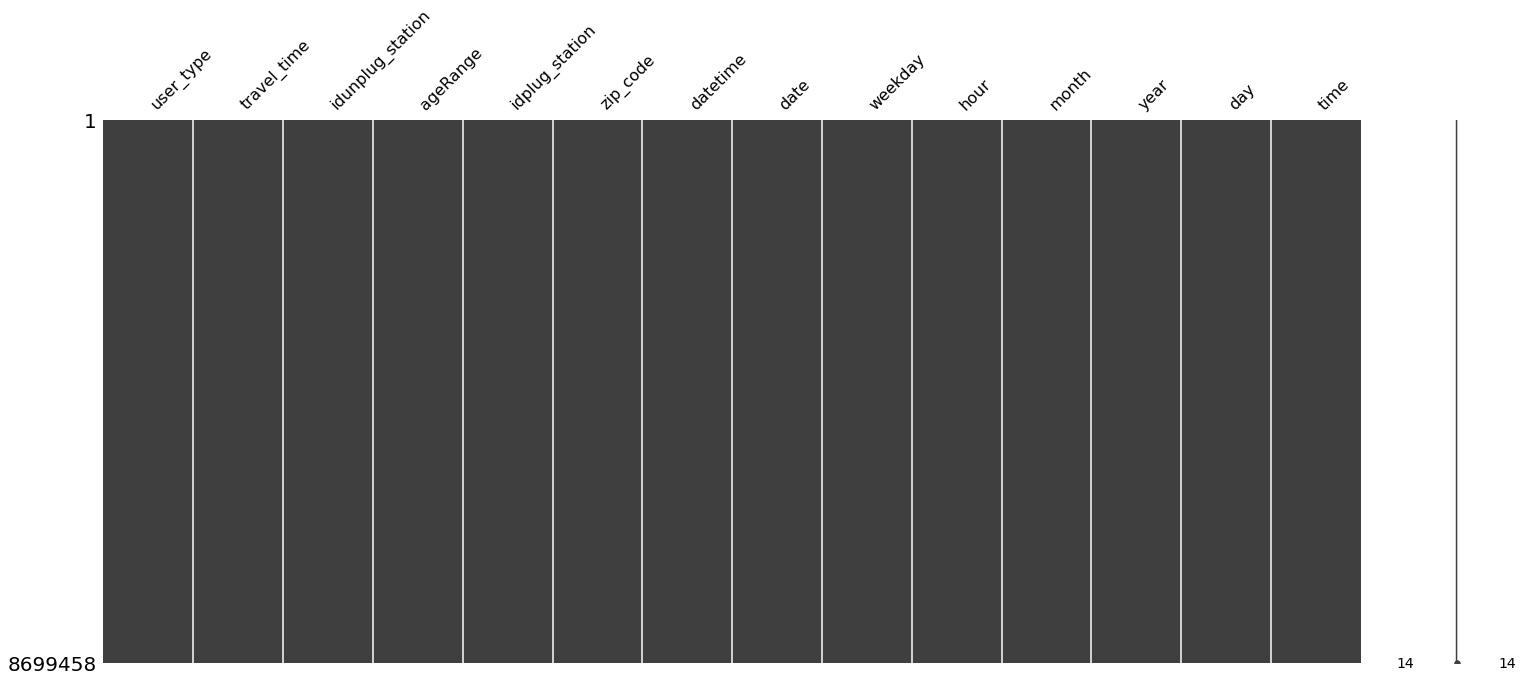

In [18]:
#pip install missingno
import missingno

missingno.matrix(movements)

From the plot above we can see that there are no NaN in our dataframe.

Now we are going to check the format of the columns

In [19]:
movements.dtypes

user_type                    int64
travel_time                float64
idunplug_station             int64
ageRange                     int64
idplug_station               int64
zip_code                    object
datetime            datetime64[ns]
date                        object
weekday                     object
hour                         int64
month                        int64
year                         int64
day                          int64
time                        object
dtype: object


## 2. Dataset: Stations. Information about stations

We are interested in predicting the demand of bicycles per area. In the dataframe of movements we have the information about the unplug station, so we need to merge that information with all the information of the station.

The data of the stations is obtained from the [open data portal of the Community of Madrid](https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=f4b07e0543815610VgnVCM1000001d4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default)

The dataset contains the following columns: 
    
**id**: code of the base station

**latitude**: latitude of the station in WGS84 format

**longitude**: lenght of the station in WGS84 format

**name**: name of the station

**light**: ocupation of the station:

    - 0: low
    - 1: medium
    - 2: high
    - 3: inactive

**number**: logical designation of the Base Station

**activate**: active station
    - 0: not active
    - 1: active
    
**no_available**: station availability
    - 0: available
    - 1: unavailable

**total_bases**: number of bases of the station

**dock_bikes**: number of docked bicycles

**free_bases**: number of free bases

**reservations_count**: number of active reservations


From this dataset we are interested in obtaining the name and coordinates of the stations, the address and the total bases available

In [20]:
stations = pd.read_json('202106.json', lines=True)
stations.head()

,_id,stations
0,2021-06-01T00:43:39.688214,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
1,2021-06-01T01:43:41.872092,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
2,2021-06-01T02:43:42.969250,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
3,2021-06-01T03:43:44.600717,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
4,2021-06-01T04:43:45.629938,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."


We want to know the number of total bases available in each stations and the information about the latitude and longitude of them, so we can consider only the first row of the file, because the information we are looking for not depend of the hour and day

In [21]:
stations = stations['stations'][711]
stations = pd.DataFrame(stations)

In [22]:
#We select the columns we are interested in 
stations = stations[['name', 'longitude', 'latitude', 'address', 'total_bases', 'id', 'number']]

In [23]:
stations.to_csv("all_stations.csv")

We are going to check if there are duplicated rows.


In [24]:
#Check if there are duplicated stations
sum(stations.duplicated())

0

## 3. Dataset: Holidays

We are going to add useful information for the predictive models. One of the important is the type of day (holiday, working day, weekend).

We use a dataframe obtained from the [open data portal of the community of madrid.](https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=9f710c96da3f9510VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default)

In [26]:
holidays_df = pd.read_csv('calendario.csv', sep=';', names=(['day', 'day_week', 'holiday', 'type', 'festivity']))

We are only interested in the information of the months and year when we have the data available. So we are going to filter the dataframe to obtain the calendar from 2018 on.

In [27]:
holidays_df

,day,day_week,holiday,type,festivity
0,Día,Día_semana,laborable / festivo / domingo festivo,Tipo de Festivo,Festividad
1,01/01/2013,martes,festivo,Festivo nacional,Año Nuevo
2,02/01/2013,miércoles,laborable,NaN,NaN
3,03/01/2013,jueves,laborable,NaN,NaN
4,04/01/2013,viernes,laborable,NaN,NaN
...,...,...,...,...,...
3647,27/12/2022,martes,NaN,NaN,NaN
3648,28/12/2022,miércoles,NaN,NaN,NaN
3649,29/12/2022,jueves,NaN,NaN,NaN
3650,30/12/2022,viernes,NaN,NaN,NaN


In [28]:
holidays_df['festivity'].unique()

array(['Festividad', 'Año Nuevo', nan, 'Traslado Epifanía del Señor',
       'Traslado San Jose', 'Jueves Santo', 'Viernes Santo',
       'Fiesta del Trabajo',
       'Dos de Mayo. Fiesta de la Comunidad de Madrid',
       'San Isidro Labrador', 'Asuncion de la Virgen',
       'Fiesta Nacional de Espania', 'Todos los Santos',
       'Ntra. Sra. de la Almudena. Patrona de la ciudad',
       'Día de la Constitucion', 'Inmaculada Concepcion',
       'Natividad del Señor', 'Epifanía del Señor', 'Corpus Christi',
       'Fiesta Nacional de España',
       'Traslado Ntra. Sra. de la Almudena. Patrona de la ciudad',
       'San Jose', 'Traslado San Isidro Labrador', 'Santiago Apostol',
       'Traslado Natividad del Señor',
       'Traslado de la festividad de San Jose',
       'Traslado de la Epifanía del Señor',
       'Día de la Constitucion Española',
       'Traslado de la Inmaculada Concepción',
       'Día de la Comunidad de Madrid', 'Asunción de la Virgen',
       'Traslado del día de

In [29]:
holidays_df['holiday'].unique()

array(['laborable / festivo / domingo festivo', 'festivo', 'laborable',
       'sábado', 'domingo', nan, 'Festivo'], dtype=object)

In [30]:
#We are only interested in knowing the holidays
holidays_df = holidays_df[(holidays_df['holiday']=='festivo') | (holidays_df['holiday']=='Festivo') ]

In [31]:
#We create the columns date, so it has the same format as the movements dataframe, so we can perform the join
holidays_df['date'] = pd.to_datetime(holidays_df['day'], dayfirst=True)
holidays_df


<ipython-input-31-eb762b087184>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holidays_df['date'] = pd.to_datetime(holidays_df['day'], dayfirst=True)


,day,day_week,holiday,type,festivity,date
1,01/01/2013,martes,festivo,Festivo nacional,Año Nuevo,2013-01-01
7,07/01/2013,lunes,festivo,Festivo nacional,Traslado Epifanía del Señor,2013-01-07
77,18/03/2013,lunes,festivo,Festivo de la Comunidad de Madrid,Traslado San Jose,2013-03-18
87,28/03/2013,jueves,festivo,Festivo de la comunidad de Madrid,Jueves Santo,2013-03-28
88,29/03/2013,viernes,festivo,Festivo nacional,Viernes Santo,2013-03-29
...,...,...,...,...,...,...
3591,01/11/2022,martes,Festivo,Festivo nacional,Todos los Santos,2022-11-01
3599,09/11/2022,miércoles,Festivo,Festivo local,Nuesta Señora de la Almudena,2022-11-09
3626,06/12/2022,martes,Festivo,Festivo nacional,Día de la Constitución Española,2022-12-06
3628,08/12/2022,jueves,Festivo,Festivo nacional,Inmaculada Concepcion,2022-12-08


# 4. Grouping the dataframe and making final dataset

We are interested in analyze and predict the demand per hour of the service of Bicimad, so we are going to group the data frame. The target variable is the number of rides per hour, in the dataframe each line represents one movement, so we are going to perform a count of the _id column (movements) to get the number of rides per hour

In [39]:
movements

,user_type,travel_time,idunplug_station,ageRange,idplug_station,zip_code,datetime,date,weekday,hour,month,year,day,time
0,1,2.700000,82,0,83,,2018-12-31 23:00:00,2018-12-31,Monday,23,12,2018,31,23:00:00
1,1,6.916667,133,5,36,28005,2018-12-31 23:00:00,2018-12-31,Monday,23,12,2018,31,23:00:00
2,1,9.083333,25,0,90,,2018-12-31 23:00:00,2018-12-31,Monday,23,12,2018,31,23:00:00
3,1,6.950000,105,3,155,28009,2018-12-31 23:00:00,2018-12-31,Monday,23,12,2018,31,23:00:00
4,1,7.466667,51,4,44,28005,2018-12-31 23:00:00,2018-12-31,Monday,23,12,2018,31,23:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413359,1,14.016667,132,5,265,28020,2021-06-30 23:00:00,2021-06-30,Wednesday,23,6,2021,30,23:00:00
413360,1,24.666667,182,5,265,28005,2021-06-30 21:00:00,2021-06-30,Wednesday,21,6,2021,30,21:00:00
413361,1,12.700000,15,5,265,28791,2021-06-29 18:00:00,2021-06-29,Tuesday,18,6,2021,29,18:00:00
413365,1,12.433333,234,0,84,,2021-06-27 19:00:00,2021-06-27,Sunday,19,6,2021,27,19:00:00


### 4.1. Dataframe with all the rides (all stations merged)

In [32]:
df_movements = movements.groupby(['date', 'weekday', 'hour', 'month', 'year', 'day', 'time','datetime']).idunplug_station.count().reset_index()

In [33]:
df_movements['rides'] = df_movements['idunplug_station']
df_movements = df_movements[['datetime', 'rides']]


In [34]:
df_movements['date'] = df_movements['datetime'].dt.date
df_movements['weekday'] = df_movements['datetime'].dt.day_name()
df_movements['hour'] = df_movements['datetime'].dt.hour
df_movements['month'] = df_movements['datetime'].dt.month
df_movements['year'] = df_movements['datetime'].dt.year
df_movements['day'] = df_movements['datetime'].dt.day
df_movements['time'] = df_movements['datetime'].dt.time

We are going to perform a resample, to fill all the values that have no rides in our dataframe

In [35]:
df_movements.set_index('datetime',inplace=True)
df_movements.sort_index(inplace=True)
df_movements_resampled = df_movements.resample('1H').sum()
df_movements_resampled

,rides,hour,month,year,day
datetime,,,,,
2018-12-31 23:00:00,176,23,12,2018,31
2019-01-01 00:00:00,254,0,1,2019,1
2019-01-01 01:00:00,169,1,1,2019,1
2019-01-01 02:00:00,105,2,1,2019,1
2019-01-01 03:00:00,83,3,1,2019,1
...,...,...,...,...,...
2021-06-30 19:00:00,813,19,6,2021,30
2021-06-30 20:00:00,552,20,6,2021,30
2021-06-30 21:00:00,571,21,6,2021,30


In [36]:
#With the resampling we added 1864 rows 
len(df_movements_resampled) - len(df_movements)

1864

In [37]:
df_movements_joined = df_movements_resampled.join(df_movements, rsuffix='_')

In [38]:
df_movements_joined = df_movements_joined.reset_index()

In [39]:
df_movements_joined.columns

Index(['datetime', 'rides', 'hour', 'month', 'year', 'day', 'rides_', 'date',
       'weekday', 'hour_', 'month_', 'year_', 'day_', 'time'],
      dtype='object')

In [40]:
df_movements_joined = df_movements_joined[['hour', 'month', 'year', 'day', 'rides', 'date', 'weekday','time', 'datetime']]
df_movements_joined

,hour,month,year,day,rides,date,weekday,time,datetime
0,23,12,2018,31,176,2018-12-31,Monday,23:00:00,2018-12-31 23:00:00
1,0,1,2019,1,254,2019-01-01,Tuesday,00:00:00,2019-01-01 00:00:00
2,1,1,2019,1,169,2019-01-01,Tuesday,01:00:00,2019-01-01 01:00:00
3,2,1,2019,1,105,2019-01-01,Tuesday,02:00:00,2019-01-01 02:00:00
4,3,1,2019,1,83,2019-01-01,Tuesday,03:00:00,2019-01-01 03:00:00
...,...,...,...,...,...,...,...,...,...
21884,19,6,2021,30,813,2021-06-30,Wednesday,19:00:00,2021-06-30 19:00:00
21885,20,6,2021,30,552,2021-06-30,Wednesday,20:00:00,2021-06-30 20:00:00
21886,21,6,2021,30,571,2021-06-30,Wednesday,21:00:00,2021-06-30 21:00:00
21887,22,6,2021,30,499,2021-06-30,Wednesday,22:00:00,2021-06-30 22:00:00


Now we are going to add the information about the holidays calendar to the dataframe. We are going to perform the join with the date column of both tables

In [41]:
df_movements_joined['date'] = df_movements_joined.date.astype('datetime64[ns]')
holidays_df['date']=holidays_df.date.astype('datetime64[ns]')

<ipython-input-41-430ea4b05b62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holidays_df['date']=holidays_df.date.astype('datetime64[ns]')


In [42]:
df_movements_joined = df_movements_joined.merge(holidays_df, how='left', on='date')

In [43]:
df_movements_joined = df_movements_joined[['date', 'weekday', 'day_x', 'hour', 'time', 'month', 'rides', 'holiday', 'datetime']]

In [44]:
df_movements_joined

,date,weekday,day_x,hour,time,month,rides,holiday,datetime
0,2018-12-31,Monday,31,23,23:00:00,12,176,NaN,2018-12-31 23:00:00
1,2019-01-01,Tuesday,1,0,00:00:00,1,254,festivo,2019-01-01 00:00:00
2,2019-01-01,Tuesday,1,1,01:00:00,1,169,festivo,2019-01-01 01:00:00
3,2019-01-01,Tuesday,1,2,02:00:00,1,105,festivo,2019-01-01 02:00:00
4,2019-01-01,Tuesday,1,3,03:00:00,1,83,festivo,2019-01-01 03:00:00
...,...,...,...,...,...,...,...,...,...
21884,2021-06-30,Wednesday,30,19,19:00:00,6,813,NaN,2021-06-30 19:00:00
21885,2021-06-30,Wednesday,30,20,20:00:00,6,552,NaN,2021-06-30 20:00:00
21886,2021-06-30,Wednesday,30,21,21:00:00,6,571,NaN,2021-06-30 21:00:00
21887,2021-06-30,Wednesday,30,22,22:00:00,6,499,NaN,2021-06-30 22:00:00


The column holiday has information only when the day is a holiday, we are going to transform the column so it has a 1 when the day is a holiday and 0 the rest of the days

In [45]:
df_movements_joined['date'] = df_movements_joined['datetime'].dt.date
df_movements_joined['day_x'] = df_movements_joined['datetime'].dt.day
df_movements_joined['hour'] = df_movements_joined['datetime'].dt.hour
df_movements_joined['month'] = df_movements_joined['datetime'].dt.month
df_movements_joined['weekday'] = df_movements_joined['datetime'].dt.day_name()
df_movements_joined['time'] = df_movements_joined['datetime'].dt.time
df_movements_joined['year'] = df_movements_joined['datetime'].dt.year

<AxesSubplot:>

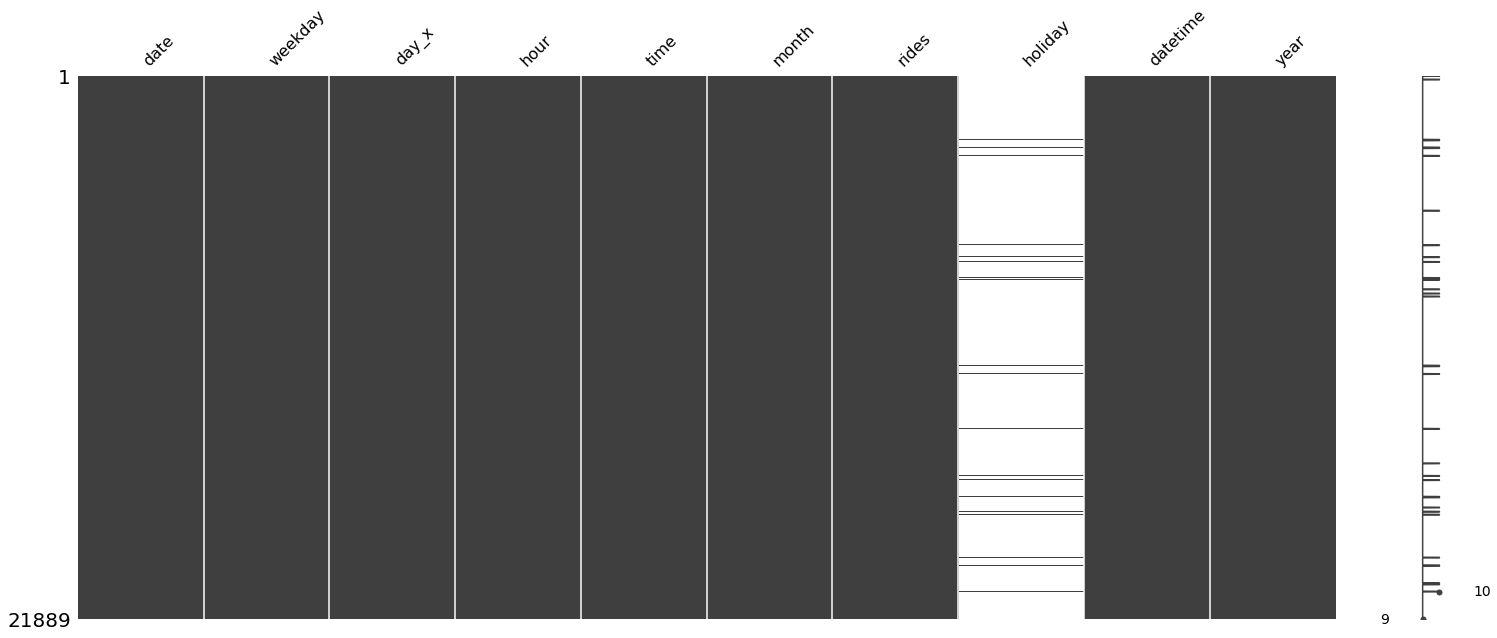

In [46]:
missingno.matrix(df_movements_joined)

In [47]:
df_movements_joined.fillna("no festivo", inplace = True)
dic_holidays = {'no festivo': 0, 'festivo': 1}
holidays_df = pd.DataFrame([[key, dic_holidays[key]] for key in dic_holidays.keys()], columns = ['holiday', 'is_holiday'])
df_movements_joined=df_movements_joined.merge(holidays_df,how='inner', left_on='holiday', right_on='holiday')

In [48]:
df_movements_joined

,date,weekday,day_x,hour,time,month,rides,holiday,datetime,year,is_holiday
0,2018-12-31,Monday,31,23,23:00:00,12,176,no festivo,2018-12-31 23:00:00,2018,0
1,2019-01-02,Wednesday,2,0,00:00:00,1,52,no festivo,2019-01-02 00:00:00,2019,0
2,2019-01-02,Wednesday,2,1,01:00:00,1,29,no festivo,2019-01-02 01:00:00,2019,0
3,2019-01-02,Wednesday,2,2,02:00:00,1,32,no festivo,2019-01-02 02:00:00,2019,0
4,2019-01-02,Wednesday,2,3,03:00:00,1,23,no festivo,2019-01-02 03:00:00,2019,0
...,...,...,...,...,...,...,...,...,...,...,...
21500,2021-01-06,Wednesday,6,19,19:00:00,1,277,festivo,2021-01-06 19:00:00,2021,1
21501,2021-01-06,Wednesday,6,20,20:00:00,1,219,festivo,2021-01-06 20:00:00,2021,1
21502,2021-01-06,Wednesday,6,21,21:00:00,1,191,festivo,2021-01-06 21:00:00,2021,1
21503,2021-01-06,Wednesday,6,22,22:00:00,1,212,festivo,2021-01-06 22:00:00,2021,1


We are also going to add a column: ``is_weekend``, this column will have the value 1 when the day is weekend.

In [49]:
def is_weekend(weekday):
    '''Giving a day as an input string returns True if day is in the weekend'''
    if weekday == 'Saturday' or weekday == "Sunday" or weekday == "saturday" or weekday == "sunday":
        return 1
    else:
        return 0

In [50]:
df_movements_joined['is_weekend'] = df_movements_joined['weekday'].apply(is_weekend)

In [51]:
#We convert the dataframe in a csv file that we will use for our models
df_movements_joined.to_csv('movements_grouped.csv')

### 4.2. Dataframe with rides per station

In [52]:
movements.columns

Index(['user_type', 'travel_time', 'idunplug_station', 'ageRange',
       'idplug_station', 'zip_code', 'datetime', 'date', 'weekday', 'hour',
       'month', 'year', 'day', 'time'],
      dtype='object')

In [53]:
df_movements_station =  movements.groupby(['idunplug_station','date', 'weekday', 'hour', 'month', 
                                           'year', 'day', 'time','datetime']).ageRange.count().reset_index()

In [54]:
df_movements_station['rides'] = df_movements_station['ageRange']
df_movements_station = df_movements_station[['idunplug_station', 'date', 'weekday', 'hour', 'month', 'year', 'day',
       'time', 'datetime',  'rides']]

We are going to join the dataframe we created previously ``stations`` with the number of rides per station in the dataframe ``df_movements_station`` in order to have information about the stations of the pickup in one table

In [55]:
stations

,name,longitude,latitude,address,total_bases,id,number
0,Puerta del Sol A,-3.7018341,40.4172137,Puerta del Sol nº 1,30,1,1a
1,Puerta del Sol B,-3.701602938060457,40.41731271011562,Puerta del Sol nº 1,30,2,1b
2,Miguel Moya,-3.7058415,40.4205886,Calle Miguel Moya nº 1,24,3,2
3,Plaza Conde Suchil,-3.7069171,40.4302937,Plaza del Conde del Valle de Súchil nº 3,18,4,3
4,Malasaña,-3.7025875,40.4285524,Calle Manuela Malasaña nº 5,24,5,4
...,...,...,...,...,...,...,...
259,INEF,-3.72997,40.43896,Avenida Juan de Herrera frente a la calle Paul...,24,265,257
260,Ciudad Universitaria 1,-3.72699,40.44375,Avenida de la Complutense (Metro Ciudad Univer...,24,266,258
261,Ciudad Universitaria 2,-3.72693,40.44342,Avenida de la Complutense (Metro Ciudad Univer...,24,267,259
262,Facultad Biología,-3.7272945,40.4483322,Calle José Antonio Novais frente al nº 12,24,268,260


There are 264 stations of bicimad in Madrid, we are going to analyze the demand by zone, so we need to know the postal code of each stations, and we will group stations by postal code

In [56]:
#We create a column that has the information about latitude and longitude
stations['location'] = stations['latitude'].map(str) + "," + stations['longitude'].map(str)

In [57]:
stations

,name,longitude,latitude,address,total_bases,id,number,location
0,Puerta del Sol A,-3.7018341,40.4172137,Puerta del Sol nº 1,30,1,1a,"40.4172137,-3.7018341"
1,Puerta del Sol B,-3.701602938060457,40.41731271011562,Puerta del Sol nº 1,30,2,1b,"40.41731271011562,-3.701602938060457"
2,Miguel Moya,-3.7058415,40.4205886,Calle Miguel Moya nº 1,24,3,2,"40.4205886,-3.7058415"
3,Plaza Conde Suchil,-3.7069171,40.4302937,Plaza del Conde del Valle de Súchil nº 3,18,4,3,"40.4302937,-3.7069171"
4,Malasaña,-3.7025875,40.4285524,Calle Manuela Malasaña nº 5,24,5,4,"40.4285524,-3.7025875"
...,...,...,...,...,...,...,...,...
259,INEF,-3.72997,40.43896,Avenida Juan de Herrera frente a la calle Paul...,24,265,257,"40.43896,-3.72997"
260,Ciudad Universitaria 1,-3.72699,40.44375,Avenida de la Complutense (Metro Ciudad Univer...,24,266,258,"40.44375,-3.72699"
261,Ciudad Universitaria 2,-3.72693,40.44342,Avenida de la Complutense (Metro Ciudad Univer...,24,267,259,"40.44342,-3.72693"
262,Facultad Biología,-3.7272945,40.4483322,Calle José Antonio Novais frente al nº 12,24,268,260,"40.4483322,-3.7272945"


We want to obtain the postal code given the location in coordinates. We are going to use the library geopy for this

In [58]:
#! pip install geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")


In [59]:
#We save in stations_locations information about the latitude and longitude of each station
stations_locations = stations['location']

In [69]:
#we use the geolocator.geocode to obtain the address of each station
address=[]

for location in stations_locations:
    address += geolocator.geocode(location)

In [70]:
address

['3, Calle de Alcalá, Barrio de los Austrias, Sol, Centro, Madrid, Área metropolitana de Madrid y Corredor del Henares, Comunidad de Madrid, 28014, España',
 (40.4172987, -3.7018201),
 'Ministerio de Hacienda y Función Pública, 9, Calle de Alcalá, Barrio de los Austrias, Sol, Centro, Madrid, Área metropolitana de Madrid y Corredor del Henares, Comunidad de Madrid, 28014, España',
 (40.41781225, -3.701547519484942),
 'Palacio de la Prensa, Calle de los Tudescos, Malasaña, Universidad, Centro, Madrid, Área metropolitana de Madrid y Corredor del Henares, Comunidad de Madrid, 28004, España',
 (40.4206956, -3.7059349201176444),
 'BBK, Plaza del Conde del Valle Suchil, Arapiles, Chamberí, Madrid, Área metropolitana de Madrid y Corredor del Henares, Comunidad de Madrid, 28001, España',
 (40.4301761, -3.7071302),
 'Le Gallinero, Calle de Manuela Malasaña, Malasaña, Universidad, Centro, Madrid, Área metropolitana de Madrid y Corredor del Henares, Comunidad de Madrid, 28004, España',
 (40.428531

In [62]:
def is_even(number):
    if number % 2 == 0:
        return False
    return True

In [63]:
postal_code = []
df_address = pd.DataFrame(address, columns = ['address'] )
df_address['index'] = df_address.index
df_address['remove'] = df_address['index'].apply(is_even)
df_address = df_address[df_address['remove']==False]
df_address['list_addresses'] = df_address['address'].str.split(", ")
list_addresses = df_address['list_addresses'].to_list()
postal_code=[]
for i,lista in enumerate(list_addresses):
    postal_code.append(lista[-2])

In [68]:
list_addresses

[['3',
  'Calle de Alcalá',
  'Barrio de los Austrias',
  'Sol',
  'Centro',
  'Madrid',
  'Área metropolitana de Madrid y Corredor del Henares',
  'Comunidad de Madrid',
  '28014',
  'España'],
 ['Ministerio de Hacienda y Función Pública',
  '9',
  'Calle de Alcalá',
  'Barrio de los Austrias',
  'Sol',
  'Centro',
  'Madrid',
  'Área metropolitana de Madrid y Corredor del Henares',
  'Comunidad de Madrid',
  '28014',
  'España'],
 ['Palacio de la Prensa',
  'Calle de los Tudescos',
  'Malasaña',
  'Universidad',
  'Centro',
  'Madrid',
  'Área metropolitana de Madrid y Corredor del Henares',
  'Comunidad de Madrid',
  '28004',
  'España'],
 ['BBK',
  'Plaza del Conde del Valle Suchil',
  'Arapiles',
  'Chamberí',
  'Madrid',
  'Área metropolitana de Madrid y Corredor del Henares',
  'Comunidad de Madrid',
  '28001',
  'España'],
 ['Le Gallinero',
  'Calle de Manuela Malasaña',
  'Malasaña',
  'Universidad',
  'Centro',
  'Madrid',
  'Área metropolitana de Madrid y Corredor del Henare

In [64]:
postal_codes = pd.DataFrame(postal_code, columns=['postal_code'])
postal_codes

,postal_code
0,28014
1,28014
2,28004
3,28001
4,28004
...,...
259,28001
260,28001
261,28001
262,28001


In [65]:
stations['index'] = stations.index
stations

,name,longitude,latitude,address,total_bases,id,number,location,index
0,Puerta del Sol A,-3.7018341,40.4172137,Puerta del Sol nº 1,30,1,1a,"40.4172137,-3.7018341",0
1,Puerta del Sol B,-3.701602938060457,40.41731271011562,Puerta del Sol nº 1,30,2,1b,"40.41731271011562,-3.701602938060457",1
2,Miguel Moya,-3.7058415,40.4205886,Calle Miguel Moya nº 1,24,3,2,"40.4205886,-3.7058415",2
3,Plaza Conde Suchil,-3.7069171,40.4302937,Plaza del Conde del Valle de Súchil nº 3,18,4,3,"40.4302937,-3.7069171",3
4,Malasaña,-3.7025875,40.4285524,Calle Manuela Malasaña nº 5,24,5,4,"40.4285524,-3.7025875",4
...,...,...,...,...,...,...,...,...,...
259,INEF,-3.72997,40.43896,Avenida Juan de Herrera frente a la calle Paul...,24,265,257,"40.43896,-3.72997",259
260,Ciudad Universitaria 1,-3.72699,40.44375,Avenida de la Complutense (Metro Ciudad Univer...,24,266,258,"40.44375,-3.72699",260
261,Ciudad Universitaria 2,-3.72693,40.44342,Avenida de la Complutense (Metro Ciudad Univer...,24,267,259,"40.44342,-3.72693",261
262,Facultad Biología,-3.7272945,40.4483322,Calle José Antonio Novais frente al nº 12,24,268,260,"40.4483322,-3.7272945",262


In [66]:
postal_codes['index']=postal_codes.index
postal_codes

,postal_code,index
0,28014,0
1,28014,1
2,28004,2
3,28001,3
4,28004,4
...,...,...
259,28001,259
260,28001,260
261,28001,261
262,28001,262


In [67]:
stations = stations.merge(postal_codes, on = 'index')

In [61]:
stations

,name,longitude,latitude,address,total_bases,id,number,location,index,postal_code
0,Puerta del Sol A,-3.7018341,40.4172137,Puerta del Sol nº 1,30,1,1a,"40.4172137,-3.7018341",0,28014
1,Puerta del Sol B,-3.701602938060457,40.41731271011562,Puerta del Sol nº 1,30,2,1b,"40.41731271011562,-3.701602938060457",1,28014
2,Miguel Moya,-3.7058415,40.4205886,Calle Miguel Moya nº 1,24,3,2,"40.4205886,-3.7058415",2,28004
3,Plaza Conde Suchil,-3.7069171,40.4302937,Plaza del Conde del Valle de Súchil nº 3,18,4,3,"40.4302937,-3.7069171",3,28001
4,Malasaña,-3.7025875,40.4285524,Calle Manuela Malasaña nº 5,24,5,4,"40.4285524,-3.7025875",4,28004
...,...,...,...,...,...,...,...,...,...,...
259,INEF,-3.72997,40.43896,Avenida Juan de Herrera frente a la calle Paul...,24,265,257,"40.43896,-3.72997",259,28001
260,Ciudad Universitaria 1,-3.72699,40.44375,Avenida de la Complutense (Metro Ciudad Univer...,24,266,258,"40.44375,-3.72699",260,28001
261,Ciudad Universitaria 2,-3.72693,40.44342,Avenida de la Complutense (Metro Ciudad Univer...,24,267,259,"40.44342,-3.72693",261,28001
262,Facultad Biología,-3.7272945,40.4483322,Calle José Antonio Novais frente al nº 12,24,268,260,"40.4483322,-3.7272945",262,28001


In [62]:
stations = stations[['id','address', 'name', 'total_bases', 'longitude', 'latitude', 'postal_code']]

In [63]:
stations.to_csv("all_stations.csv")

In [143]:
df_movements_station

,idunplug_station,date,weekday,hour,month,year,day,time,datetime,rides
0,1,2019-01-01,Tuesday,8,1,2019,1,08:00:00,2019-01-01 08:00:00,1
1,1,2019-01-01,Tuesday,11,1,2019,1,11:00:00,2019-01-01 11:00:00,1
2,1,2019-01-01,Tuesday,13,1,2019,1,13:00:00,2019-01-01 13:00:00,1
3,1,2019-01-01,Tuesday,14,1,2019,1,14:00:00,2019-01-01 14:00:00,1
4,1,2019-01-01,Tuesday,15,1,2019,1,15:00:00,2019-01-01 15:00:00,2
...,...,...,...,...,...,...,...,...,...,...
2629796,2008,2020-07-23,Thursday,11,7,2020,23,11:00:00,2020-07-23 11:00:00,1
2629797,2008,2020-08-31,Monday,20,8,2020,31,20:00:00,2020-08-31 20:00:00,1
2629798,2008,2020-09-29,Tuesday,10,9,2020,29,10:00:00,2020-09-29 10:00:00,2
2629799,2008,2020-12-18,Friday,12,12,2020,18,12:00:00,2020-12-18 12:00:00,1


In [146]:
df_movements_station = df_movements_station.merge(stations, how='inner', left_on='idunplug_station', right_on = 'id')

In [147]:
df_movements_station

,idunplug_station,date,weekday,hour,month,year,day,time,datetime,rides,id,address,name,total_bases,longitude,latitude,postal_code
0,1,2019-01-01,Tuesday,8,1,2019,1,08:00:00,2019-01-01 08:00:00,1,1,Puerta del Sol nº 1,Puerta del Sol A,30,-3.7018341,40.4172137,28014
1,1,2019-01-01,Tuesday,11,1,2019,1,11:00:00,2019-01-01 11:00:00,1,1,Puerta del Sol nº 1,Puerta del Sol A,30,-3.7018341,40.4172137,28014
2,1,2019-01-01,Tuesday,13,1,2019,1,13:00:00,2019-01-01 13:00:00,1,1,Puerta del Sol nº 1,Puerta del Sol A,30,-3.7018341,40.4172137,28014
3,1,2019-01-01,Tuesday,14,1,2019,1,14:00:00,2019-01-01 14:00:00,1,1,Puerta del Sol nº 1,Puerta del Sol A,30,-3.7018341,40.4172137,28014
4,1,2019-01-01,Tuesday,15,1,2019,1,15:00:00,2019-01-01 15:00:00,2,1,Puerta del Sol nº 1,Puerta del Sol A,30,-3.7018341,40.4172137,28014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2629781,270,2021-06-30,Wednesday,18,6,2021,30,18:00:00,2021-06-30 18:00:00,4,270,Calle Zurbano nº 90,Zurbano,24,-3.69281,40.43837,28003
2629782,270,2021-06-30,Wednesday,19,6,2021,30,19:00:00,2021-06-30 19:00:00,2,270,Calle Zurbano nº 90,Zurbano,24,-3.69281,40.43837,28003
2629783,270,2021-06-30,Wednesday,20,6,2021,30,20:00:00,2021-06-30 20:00:00,2,270,Calle Zurbano nº 90,Zurbano,24,-3.69281,40.43837,28003
2629784,270,2021-06-30,Wednesday,21,6,2021,30,21:00:00,2021-06-30 21:00:00,1,270,Calle Zurbano nº 90,Zurbano,24,-3.69281,40.43837,28003


In [249]:
#We save the result in a csv that we will use for other notebooks
df_movements_station = df_movements_station.to_csv("rides_per_station.csv")